In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.offline import iplot
import plotly as py
import cufflinks as cf
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

import warnings 
warnings.filterwarnings('ignore')

### Importing The DataSet

In [2]:
df_census = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")

In [3]:
df_census.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df_census.shape

(32560, 15)

DataSet Contains 32560 rows and 15 columns.

In [5]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df_census.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df_census.isnull().sum() # checking the null values

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

### Observations :

* As per the problem statement we need to predict the income if it is 50 or more then problem seems classification.
* There is no null values in the dataset.
* Column 'Capital_gain' shows higher variance among teh features.
* As per wikipidia two columns 'Capital_gain' and 'Capital_loss'works 'vice versa' means similer way will check corerlation
in further analysis.
* There are few columns which cotrain '0' values we have to deal with it.
* Outlairs are present in 'Capital_gain & Capital_loss' columns.
* Our prediction column 'Income' we can convert into binary.

### Backup Dataset :

In [8]:
copy_of_df = df_census.copy()

### Exploratry Data Analysis (EDA):

In [9]:
sns.set(style='darkgrid')

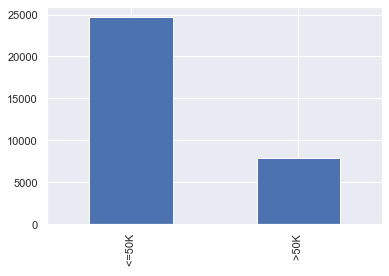

In [10]:
df_census['Income'].value_counts().plot(kind='bar')

The ratio of above values 24% and 76% as our data set contains 32560 it will not too much bias so we can consider it is not too much unbalanced.

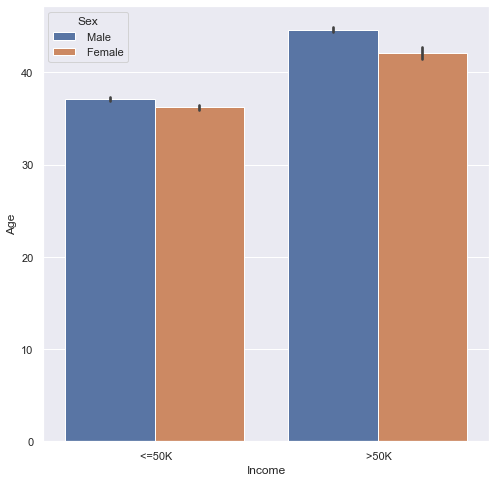

In [11]:
#Checking the distribution of Income and  Age
plt.figure(figsize=(8,8))
sns.barplot(x='Income',y='Age',data=df_census,hue='Sex')

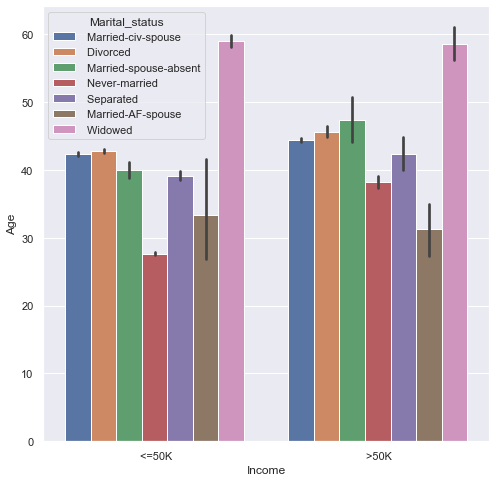

In [12]:
#Checking the distribution of Income and  Age as per Marital_status
plt.figure(figsize=(8,8))
sns.barplot(x='Income',y='Age',data=df_census,hue='Marital_status')

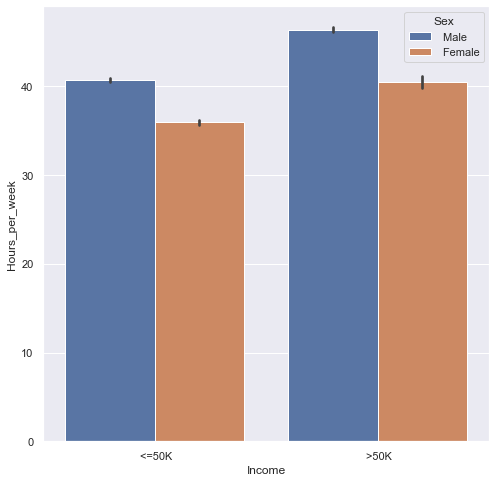

In [13]:
#Checking the distribution of Income and  Hours_per_week as gender
plt.figure(figsize=(8,8))
sns.barplot(x='Income',y='Hours_per_week',data=df_census,hue='Sex')

In [14]:
df_census['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [15]:
#df_census['Native_country'] = df_census['Native_country'].replace('?',df_census['Native_country'].mode(1),inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text major ticklabel objects>)

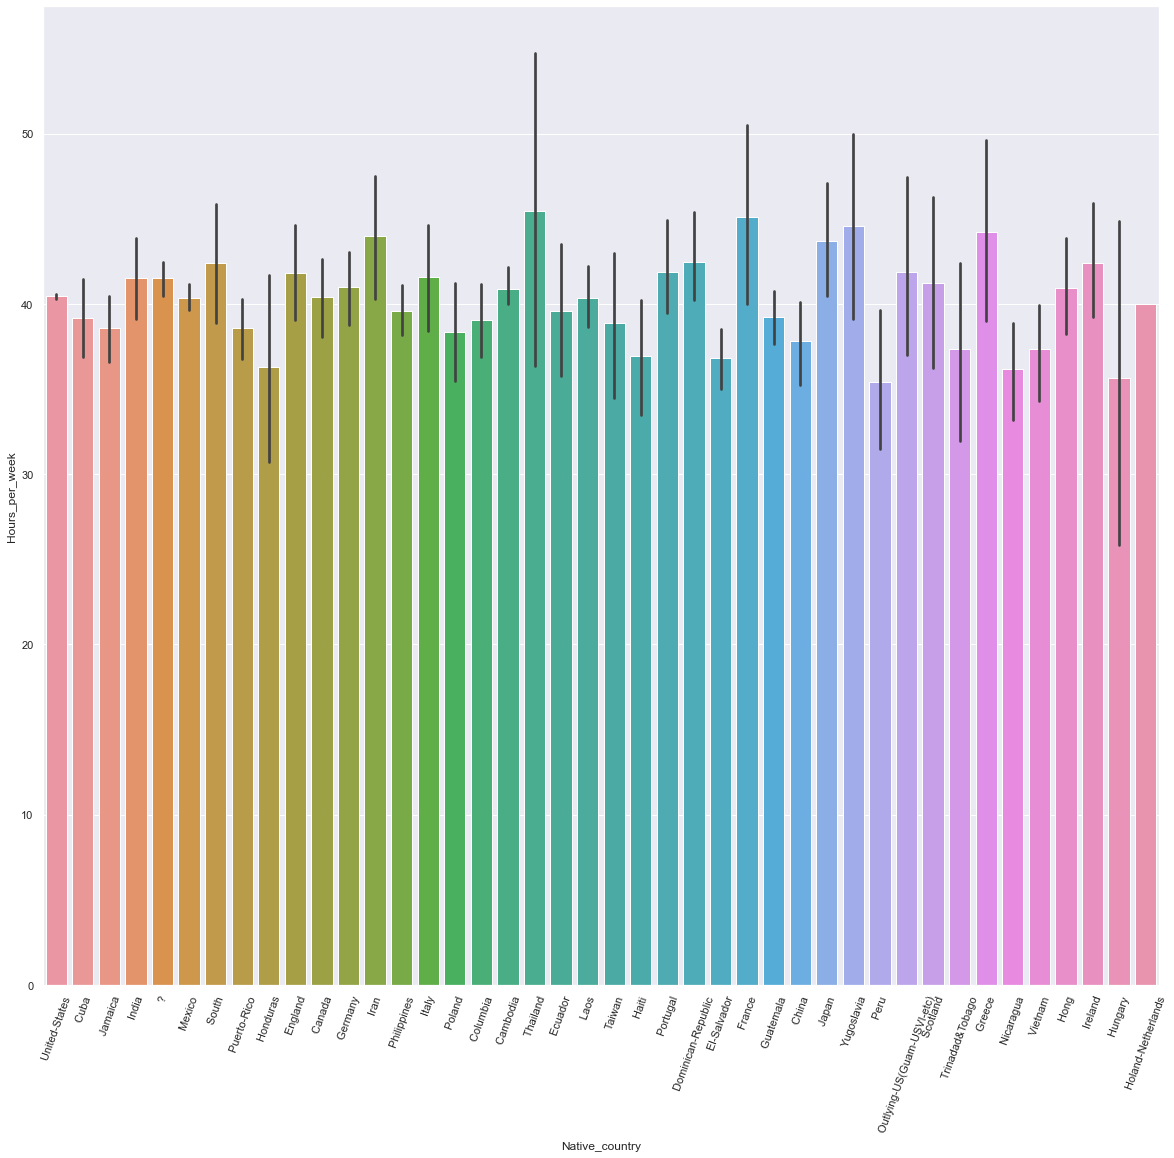

In [16]:
#Checking the distribution of Income and  Hours_per_week as gender
plt.figure(figsize=(20,18))
sns.barplot(x='Native_country',y='Hours_per_week',data=df_census)
plt.xticks(rotation=70)

In [17]:
df_census.loc[df_census.Native_country==' ?'] # 583 row has no country hence we are removing by index

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
13,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
37,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
50,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
92,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32448,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?,>50K
32468,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K
32491,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,?,<=50K
32509,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,?,>50K


In [18]:
df_census.drop(df_census[df_census['Native_country'] == ' ?'].index,inplace=True) 

In [19]:
df_census['Native_country'].unique() # now we can see values has been removed

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

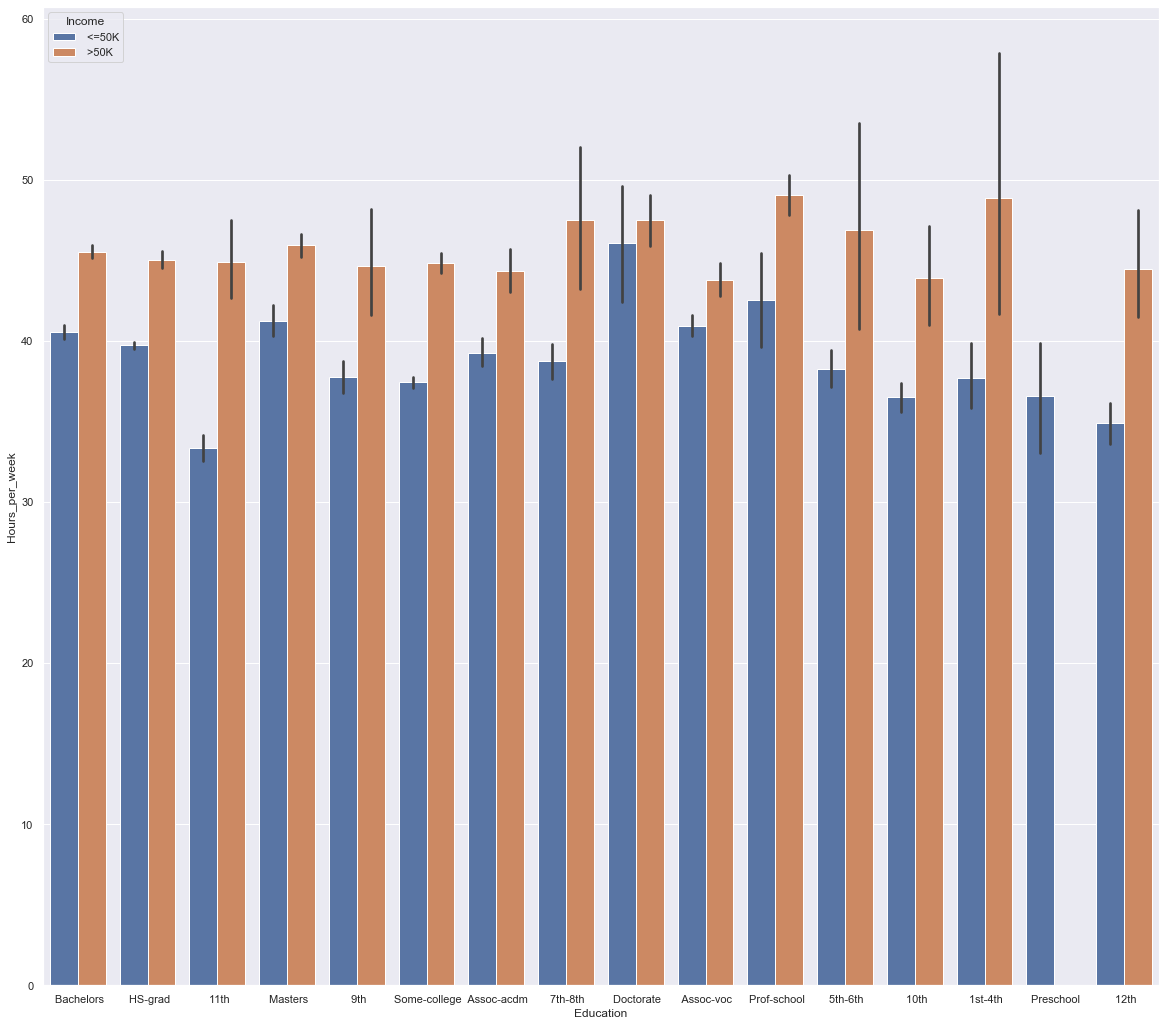

In [20]:
#Checking the distribution of Education and  Hours_per_week as gender
plt.figure(figsize=(20,18))
sns.barplot(x='Education',y='Hours_per_week',data=df_census,hue='Income')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

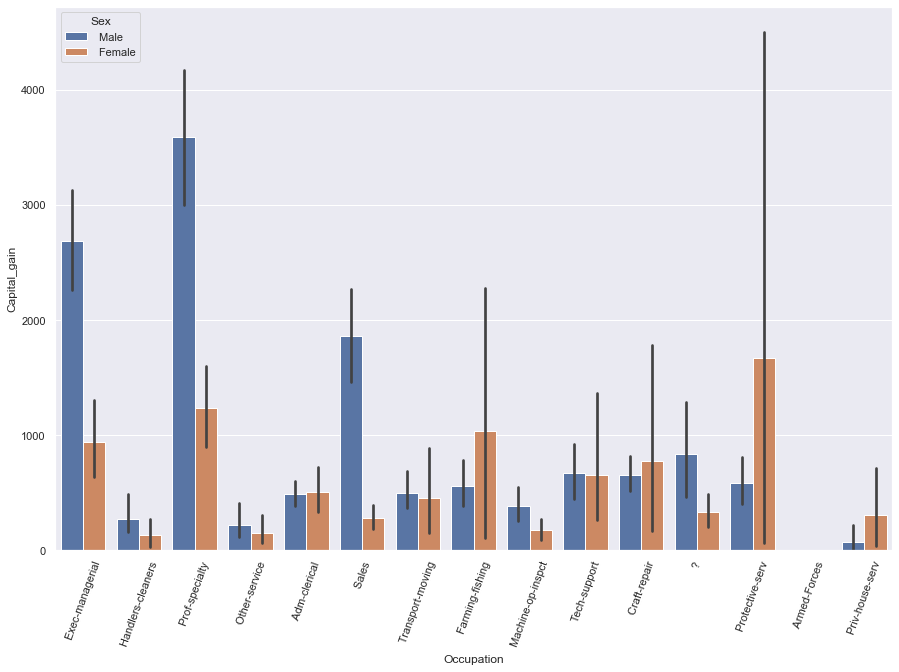

In [21]:
#Checking the distribution of Capital_gain and  Occupation as gender
plt.figure(figsize=(15,10))
sns.barplot(x='Occupation',y='Capital_gain',data=df_census,hue='Sex')
plt.xticks(rotation=70)

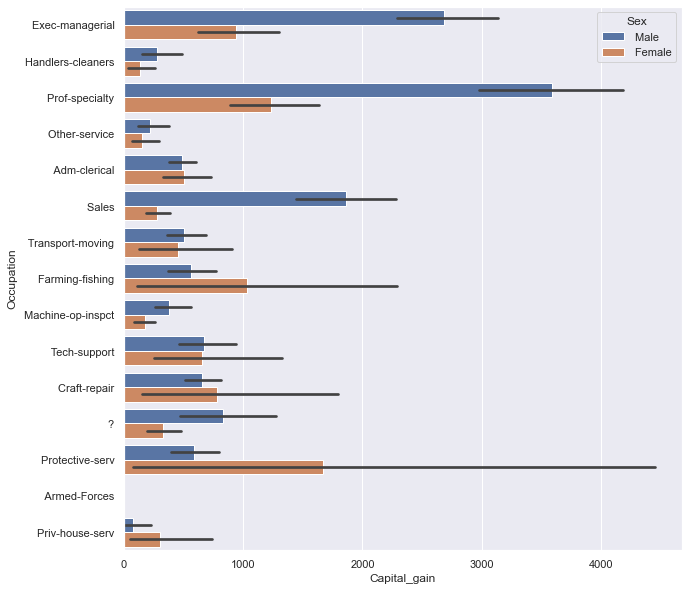

In [22]:
#Checking the distribution of Capital_gain and  Occupation as gender
plt.figure(figsize=(10,10))
sns.barplot(x='Capital_gain',y='Occupation',data=df_census,hue='Sex')

In [23]:
df_census.loc[df_census.Occupation==' ?'] # in Occupation also there is unamed values which we have to remove

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
26,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
68,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
127,35,?,129305,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32530,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [24]:
df_census.drop(df_census[df_census['Occupation'] == ' ?'].index,inplace=True)  # removeing the unnamed values

In [25]:
df_census['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
       ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

#### Outliars Detection And Removel :

In [26]:
# Filltering the numeric columns
numeric_data = df_census.select_dtypes(include=['int64','float64'])
numeric_data.columns

Index(['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week'],
      dtype='object')

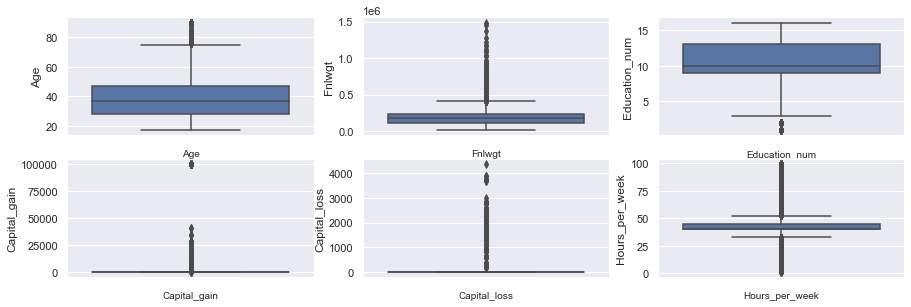

In [27]:
# Checking the distribution of data
plt.figure(figsize=(15,10))
plotnumber=1
for column in numeric_data:
    if plotnumber <=10:
        plt.subplot(4,3,plotnumber)
        sns.boxplot(numeric_data[column],orient='v')
        plt.xlabel(column,fontsize=10)
        plotnumber+=1
plt.show()

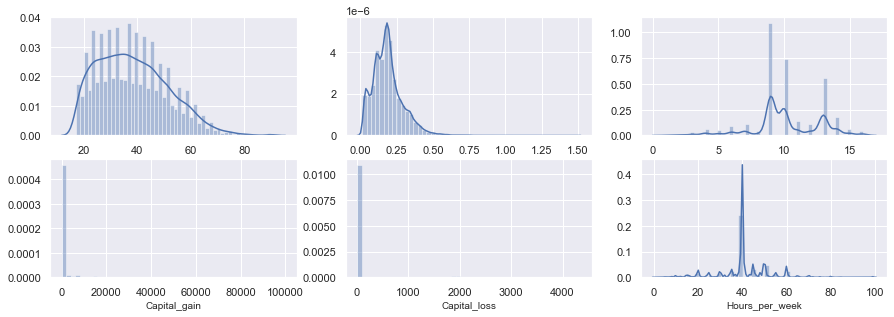

In [28]:
# Checking the distribution of data
plt.figure(figsize=(15,10))
plotnumber=1
for column in numeric_data:
    if plotnumber <=10:
        plt.subplot(4,3,plotnumber)
        sns.distplot(numeric_data[column])
        plt.xlabel(column,fontsize=10)
        plotnumber+=1
plt.show()

#### Checking correlation using heat map

In [29]:
corrrelation = numeric_data.corr()

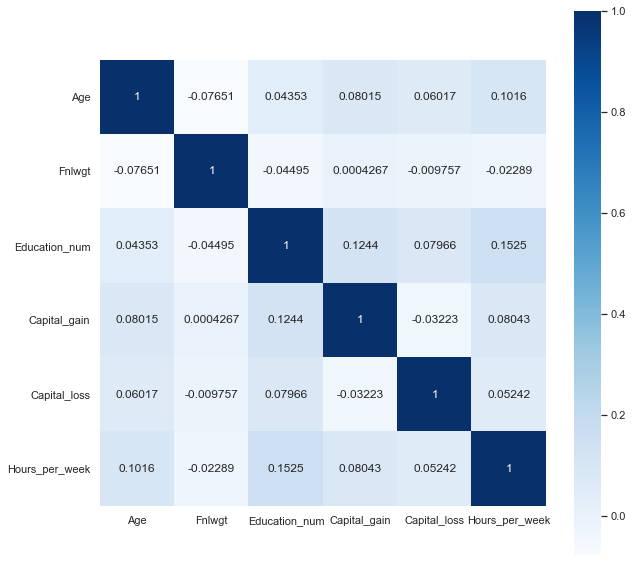

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(corrrelation,cbar=True, square=True,fmt='.4g',annot=True,annot_kws={'size':12},cmap='Blues')

As per our heatmap few columns like 'Fnlwgt' ,'Capital_gain','Education_num' and 'Capital_loss' showing negatively correlated.

### Feature Engineering :

Endoding Categorical Variables :

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
le = LabelEncoder()

In [33]:
df_census['Income']=le.fit_transform(df_census['Income'])
df_census['Sex']=le.fit_transform(df_census['Sex'])

In [34]:
df_census.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,0,0,0,40,United-States,0


In [35]:
df_census = pd.get_dummies(df_census,drop_first=True)

In [36]:
pd.set_option('display.max_columns',100)

In [37]:
df_census.head()

,Age,Fnlwgt,Education_num,Sex,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Education_ 11th,Education_ 12th,Education_ 1st-4th,Education_ 5th-6th,Education_ 7th-8th,Education_ 9th,Education_ Assoc-acdm,Education_ Assoc-voc,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_ Preschool,Education_ Prof-school,Education_ Some-college,Marital_status_ Married-AF-spouse,Marital_status_ Married-civ-spouse,Marital_status_ Married-spouse-absent,Marital_status_ Never-married,Marital_status_ Separated,Marital_status_ Widowed,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Native_country_ Canada,Native_country_ China,Native_country_ Columbia,Native_country_ Cuba,Native_country_ Dominican-Republic,Native_country_ Ecuador,Native_country_ El-Salvador,Native_country_ England,Native_country_ France,Native_country_ Germany,Native_country_ Greece,Native_country_ Guatemala,Native_country_ Haiti,Native_country_ Holand-Netherlands,Native_country_ Honduras,Native_country_ Hong,Native_country_ Hungary,Native_country_ India,Native_country_ Iran,Native_country_ Ireland,Native_country_ Italy,Native_country_ Jamaica,Native_country_ Japan,Native_country_ Laos,Native_country_ Mexico,Native_country_ Nicaragua,Native_country_ Outlying-US(Guam-USVI-etc),Native_country_ Peru,Native_country_ Philippines,Native_country_ Poland,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,50,83311,13,1,0,0,13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,38,215646,9,1,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,53,234721,7,1,0,0,40,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,28,338409,13,0,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## Model Building :

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()

In [40]:
# train_col_sacle = df_census[['Age','Fnlwgt','Education_num','Hours_per_week']]

In [41]:
# train_scaler_col = scaler.fit_transform(train_col_sacle)

In [42]:
# train_scaler_col = pd.DataFrame(train_scaler_col,columns=train_col_sacle.columns)

In [43]:
# df_census['Age']= train_scaler_col['Age']
# df_census['Fnlwgt']= train_scaler_col['Fnlwgt']
# df_census['Education_num']= train_scaler_col['Education_num']
# df_census['Hours_per_week']= train_scaler_col['Hours_per_week']

In [44]:
X = df_census.drop(['Income'],axis=1)
y = df_census['Income']

In [45]:
x_scale = scaler.fit_transform(X)

In [46]:
X_train, X_test, y_train, y_test  = train_test_split(x_scale,y, test_size=0.30, random_state=11)

Importing libraries for model building......!

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [48]:
lr=LogisticRegression()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
adb=AdaBoostClassifier()
svm=SVC()
gdboost=GradientBoostingClassifier()
xgboost=XGBClassifier()
print("Model is created")

Model is created


In [49]:
lr.fit(X_train, y_train)
knn.fit(X_train,y_train)
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)
adb.fit(X_train,y_train)
svm.fit(X_train,y_train)
gdboost.fit(X_train,y_train)
xgboost.fit(X_train,y_train)
print("Model is trained")

[16:24:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model is trained


In [50]:
print("Lr classification score",lr.score(X_train,y_train))
print("knn classification score",knn.score(X_train,y_train))
print("dt classification score",dt.score(X_train,y_train))
print("rf classification score",rf.score(X_train,y_train))
print("adb classification score",adb.score(X_train,y_train))
print("svm classification score",svm.score(X_train,y_train))
print("gdboost classification score",gdboost.score(X_train,y_train))
print("xgboost classification score",xgboost.score(X_train,y_train))

Lr classification score 0.8516483516483516
knn classification score 0.8714948844259189
dt classification score 1.0
rf classification score 0.9999526335733232
adb classification score 0.8606479727169383
svm classification score 0.8598427434634331
gdboost classification score 0.8682266009852216
xgboost classification score 0.9067355058734369


### Model Evaluation :

Using confusion matrix in order to evaluate the models accuracy.

In [51]:
lr_yprad = lr.predict(X_test)
knn_yprad = knn.predict(X_test)
dt_yprad = dt.predict(X_test)
rf_yprad = rf.predict(X_test)
adb_yprad = adb.predict(X_test)
svm_yprad = svm.predict(X_test)
gdboost_yprad = gdboost.predict(X_test)
xgboost_yprad = xgboost.predict(X_test)

In [52]:
lr_conf_mat = confusion_matrix(y_test,lr_yprad)
print("confusion matrix for lr_model",'\n',lr_conf_mat)

confusion matrix for lr_model 
 [[6276  544]
 [ 870 1359]]


In [53]:
knn_conf_mat = confusion_matrix(y_test,knn_yprad)
print("confusion matrix for knn_model",'\n',knn_conf_mat)

confusion matrix for knn_model 
 [[6053  767]
 [ 930 1299]]


In [54]:
dt_conf_mat = confusion_matrix(y_test,dt_yprad)
print("confusion matrix for dt_model",'\n',dt_conf_mat)

confusion matrix for dt_model 
 [[5895  925]
 [ 848 1381]]


In [55]:
rf_conf_mat = confusion_matrix(y_test,rf_yprad)
print("confusion matrix for lr_model",'\n',rf_conf_mat)

confusion matrix for lr_model 
 [[6258  562]
 [ 851 1378]]


In [56]:
adb_conf_mat = confusion_matrix(y_test,adb_yprad)
print("confusion matrix for lr_model",'\n',adb_conf_mat)

confusion matrix for lr_model 
 [[6377  443]
 [ 888 1341]]


In [57]:
svm_conf_mat = confusion_matrix(y_test,svm_yprad)
print("confusion matrix for svm_model",'\n',svm_conf_mat)

confusion matrix for svm_model 
 [[6347  473]
 [ 988 1241]]


In [58]:
gdboost_conf_mat = confusion_matrix(y_test,gdboost_yprad)
print("confusion matrix for gdboost_model",'\n',gdboost_conf_mat)

confusion matrix for gdboost_model 
 [[6411  409]
 [ 880 1349]]


In [59]:
xgboost_conf_mat = confusion_matrix(y_test,xgboost_yprad)
print("confusion matrix for xgboost_model",'\n',xgboost_conf_mat)

confusion matrix for xgboost_model 
 [[6322  498]
 [ 745 1484]]


In [60]:
lr_report = classification_report(y_test,lr_yprad)
print(" lr classification_report" ,'\n',lr_report)

knn_report = classification_report(y_test,knn_yprad)
print(" knn classification_report" ,'\n',knn_report)

dt_report = classification_report(y_test,dt_yprad)
print(" dt classification_report" ,'\n',dt_report)


rf_report = classification_report(y_test,rf_yprad)
print(" rf classification_report" ,'\n',rf_report)


adb_report = classification_report(y_test,adb_yprad)
print(" adb classification_report" ,'\n',adb_report)


svm_report = classification_report(y_test,svm_yprad)
print(" svm classification_report" ,'\n',svm_report)


gdboost_report = classification_report(y_test,gdboost_yprad)
print(" gdboost classification_report" ,'\n',gdboost_report)


xgboost_report = classification_report(y_test,xgboost_yprad)
print(" xgboost classification_report" ,'\n',xgboost_report)

 lr classification_report 
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      6820
           1       0.71      0.61      0.66      2229

    accuracy                           0.84      9049
   macro avg       0.80      0.76      0.78      9049
weighted avg       0.84      0.84      0.84      9049

 knn classification_report 
               precision    recall  f1-score   support

           0       0.87      0.89      0.88      6820
           1       0.63      0.58      0.60      2229

    accuracy                           0.81      9049
   macro avg       0.75      0.74      0.74      9049
weighted avg       0.81      0.81      0.81      9049

 dt classification_report 
               precision    recall  f1-score   support

           0       0.87      0.86      0.87      6820
           1       0.60      0.62      0.61      2229

    accuracy                           0.80      9049
   macro avg       0.74      0.74      0.74

### ROC AND AUC :

for performance measurement..........!

In [61]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [62]:
print(roc_auc_score(y_test,lr.predict(X_test)))
print(roc_auc_score(y_test,knn.predict(X_test)))
print(roc_auc_score(y_test,dt.predict(X_test)))
print(roc_auc_score(y_test,rf.predict(X_test)))
print(roc_auc_score(y_test,adb.predict(X_test)))
print(roc_auc_score(y_test,svm.predict(X_test)))
print(roc_auc_score(y_test,gdboost.predict(X_test)))
print(roc_auc_score(y_test,xgboost.predict(X_test)))

0.7649625241254642
0.7351546003165419
0.7419649212131736
0.767904876928886
0.7683295311470104
0.7436985339874673
0.772616726462296
0.7963744377303185


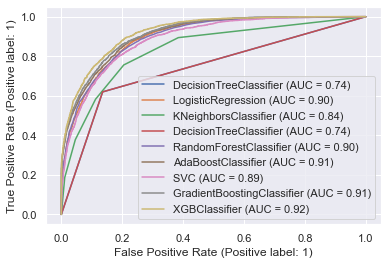

In [63]:
#lets find roc curve to check best fittted model
disp = plot_roc_curve(dt,X_test,y_test)
plot_roc_curve(lr,X_test,y_test,ax=disp.ax_)  # here ax_ for axis with confustion matrics
plot_roc_curve(knn,X_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,X_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,X_test,y_test,ax=disp.ax_)
plot_roc_curve(adb,X_test,y_test,ax=disp.ax_)
plot_roc_curve(svm,X_test,y_test,ax=disp.ax_)
plot_roc_curve(gdboost,X_test,y_test,ax=disp.ax_)
plot_roc_curve(xgboost,X_test,y_test,ax=disp.ax_)
plt.legend(prop = {'size':11}, loc ='lower right')

### CrossValidation :

In [64]:
from sklearn.model_selection import KFold,cross_val_score

In [65]:
k_f = KFold(n_splits=3,shuffle=True)
k_f

KFold(n_splits=3, random_state=None, shuffle=True)

In [66]:
print("Cross validation score for lr model","=>",cross_val_score(lr,X,y,cv=5))
print("Cross validation score for knn model","=>",cross_val_score(knn,X,y,cv=5))
print("Cross validation score for dt model","=>",cross_val_score(dt,X,y,cv=5))
print("Cross validation score for rf model","=>",cross_val_score(rf,X,y,cv=5))
print("Cross validation score for adb model","=>",cross_val_score(adb,X,y,cv=5))
print("Cross validation score for SVM model","=>",cross_val_score(svm,X,y,cv=5))
print("Cross validation score for gdboost model","=>",cross_val_score(gdboost,X,y,cv=5))
print("Cross validation score for xgboost model","=>",cross_val_score(xgboost,X,y,cv=5))

Cross validation score for lr model => [0.79048566 0.78746684 0.79293767 0.78846154 0.79426393]
Cross validation score for knn model => [0.76810874 0.76956233 0.76856764 0.76359416 0.76972812]
Cross validation score for dt model => [0.801757   0.79824271 0.80570292 0.81432361 0.81100796]
Cross validation score for rf model => [0.8496602  0.8456565  0.8484748  0.85676393 0.85261936]
Cross validation score for adb model => [0.85148351 0.84764589 0.8579244  0.86356101 0.86057692]
Cross validation score for SVM model => [0.78833085 0.78614058 0.78713528 0.78862732 0.78796419]
Cross validation score for gdboost model => [0.85844522 0.85494032 0.86438992 0.86654509 0.8655504 ]
[16:43:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:43:28]

In [67]:
print("Mean of Cross validation score for lr model","=>",cross_val_score(lr,X,y,cv=5).mean())
print("Mean of Cross validation score for knn model","=>",cross_val_score(knn,X,y,cv=5).mean())
print("Mean of Cross validation score for dt model","=>",cross_val_score(dt,X,y,cv=5).mean())
print("Mean of Cross validation score for rf model","=>",cross_val_score(rf,X,y,cv=5).mean())
print("Mean of Cross validation score for adb model","=>",cross_val_score(adb,X,y,cv=5).mean())
print("Mean of Cross validation score for SVM model","=>",cross_val_score(svm,X,y,cv=5).mean())
print("Mean of Cross validation score for gdboost  model","=>",cross_val_score(gdboost,X,y,cv=5).mean())
print("Cross validation score for xgboost model","=>",cross_val_score(xgboost,X,y,cv=5).mean())

Mean of Cross validation score for lr model => 0.7907231271332165
Mean of Cross validation score for knn model => 0.7679121979862304
Mean of Cross validation score for dt model => 0.8068368282580203
Mean of Cross validation score for rf model => 0.8511654566990308
Mean of Cross validation score for adb model => 0.8562383460375539
Mean of Cross validation score for SVM model => 0.7876396442026854
Mean of Cross validation score for gdboost  model => 0.8616757809940992
[16:57:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:57:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from '

Accuracy and crossvalidation I found xgboost model would be a good predictor for our problem.Now i am using the hperparameter tuning to check chances of increment in accuracy.

### HyperParameter Tuning !

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
xgboost.get_params().keys()  # to check the parameters

dict_keys(['objective', 'use_label_encoder', 'base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'gamma', 'gpu_id', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])

In [70]:
parm_grid  = {'max_depth' : [3,4],
              'subsample' : [0.5,0.8],
              'learning_rate': [0.1],
              'min_child_weight' : [1,2],
              'random_state' : [4,5]}
parm_grid

{'max_depth': [3, 4],
 'subsample': [0.5, 0.8],
 'learning_rate': [0.1],
 'min_child_weight': [1, 2],
 'random_state': [4, 5]}

In [71]:
gridsearch = GridSearchCV(xgboost, param_grid = parm_grid , cv=5)

In [72]:
gridsearch.fit(X_train,y_train)

[17:00:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:00:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:00:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:00:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=2,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
         

In [73]:
gridsearch.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 2,
 'random_state': 4,
 'subsample': 0.8}

In [80]:
xgboost_tuning=XGBClassifier(learning_rate=0.1,max_depth=4,min_child_weight=2,random_state=4,subsample=0.8)

In [81]:
xgboost_tuning.fit(X_train,y_train)

[17:16:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=4,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [82]:
xgboost_tuning.score(X_train,y_train)

0.8735790071996968

In [83]:
xgboost_tuning_yprad = xgboost_tuning.predict(X_test)

In [84]:
xgboost_conf_mat = confusion_matrix(y_test,xgboost_tuning_yprad)
print("confusion matrix for xgboost_model",'\n',xgboost_conf_mat)

confusion matrix for xgboost_model 
 [[6388  432]
 [ 823 1406]]


In [85]:
xgboost_report = classification_report(y_test,xgboost_tuning_yprad)
print(" xgboost classification_report" ,'\n',xgboost_report)

 xgboost classification_report 
               precision    recall  f1-score   support

           0       0.89      0.94      0.91      6820
           1       0.76      0.63      0.69      2229

    accuracy                           0.86      9049
   macro avg       0.83      0.78      0.80      9049
weighted avg       0.86      0.86      0.86      9049



We can see with and without hyperparameter tuning we are getting same score.

### Saving Model

In [86]:
import pickle 

In [87]:
Census_model = 'Census_model.pickle'

In [89]:
pickle.dump(xgboost_tuning,open(Census_model,'wb'))

### Thank You !